In [10]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg


from statsmodels.tsa.stattools import acovf
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

from scipy.fft import fft, ifft, fftfreq
import scipy.signal as signal

from statsmodels.graphics.tsaplots import plot_acf

In [2]:
semilla = 231
n = 1000
deltaF = 1

![Texto alternativo](Autocorrelacion.jpg)

# Función CTS-DP

In [3]:
def DFT_RG_PRIMA(Rxx, dt):
    n = len(Rxx)
    P_Gprima = fft(np.sqrt(Rxx/8+0j))
    P_Gprima = P_Gprima[:n]
    freq = fftfreq(n, dt)
    freq = freq[:n]
    return P_Gprima, freq

In [9]:
G1 = np.random.normal(loc=0, scale=1, size=len(datos_AR1_09))

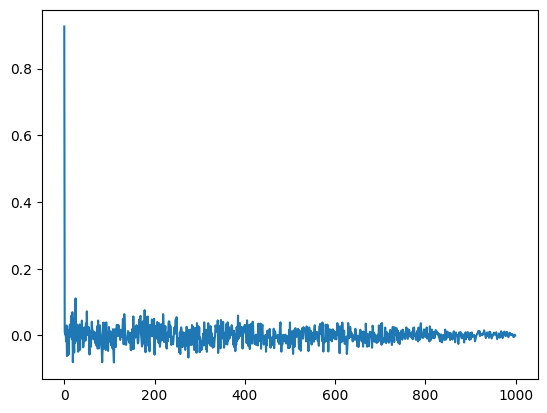

In [15]:
autocovarianza = acovf(G1, fft=True)

plt.plot(autocovarianza)

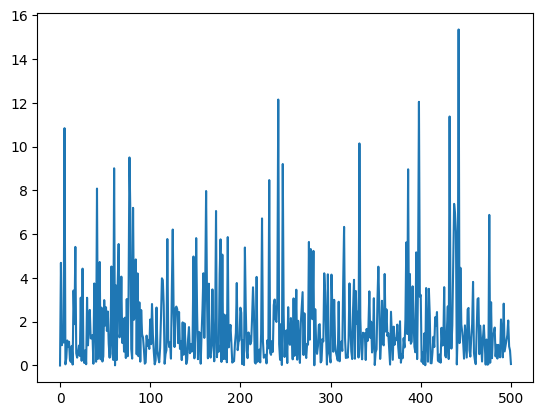

In [17]:
from scipy.signal import periodogram


# Calcular la densidad espectral de potencia
frequencias, psd = periodogram(G1)

# Imprimir la PSD
plt.plot(psd)


In [118]:

def CTSDP(datos,epsilon,deltaF):
        
    # función de autocorrelación de los datos: 
    Rxx = sm.tsa.acf(datos, nlags=(len(datos)-1))

    # Calcula lambda
    l = deltaF / epsilon

    # Calcula la desviación estándar del ruido blanco
    desv = np.sqrt(2 * l)


    # crear 4 ruidos blancos    
    G1 = np.random.normal(loc=0, scale=desv, size=len(datos))
    G2 = np.random.normal(loc=0, scale=desv, size=len(datos))
    G3 = np.random.normal(loc=0, scale=desv, size=len(datos))
    G4 = np.random.normal(loc=0, scale=desv, size=len(datos))

    # encontrar Autocorrelación del ruido en frecuencia.

    RG_PRIMA,frecuencias_RGPRIMA = DFT_RG_PRIMA(Rxx,1)




    # encontrar N_0 de los ruidos
    N_01 = np.var(G1) 
    N_02 = np.var(G2) 
    N_03 = np.var(G3) 
    N_04 = np.var(G4) 

    # encntrar filtro en frecuencias 
    H_W1 = RG_PRIMA/N_01

    H_W2 = RG_PRIMA/N_02

    H_W3 = RG_PRIMA/N_03

    H_W4 = RG_PRIMA/N_04

    # pasar el ruido a dominio de frecuencias
    G1_DFT = fft(G1)

    G2_DFT = fft(G2)

    G3_DFT = fft(G3)

    G4_DFT = fft(G4)

    # aplicar filtro.

    Filtro1 = G1_DFT * H_W1

    Filtro2 = G2_DFT * H_W2

    Filtro3 = G3_DFT * H_W3

    Filtro4 = G4_DFT * H_W4

    # pasar ruido de frecuencias a dominio de tiempo

    G1_prima = ifft(Filtro1).real

    G2_prima = ifft(Filtro2).real

    G3_prima = ifft(Filtro3).real

    G4_prima = ifft(Filtro4).real

    # encontrar Z

    suma = np.add(np.power(G1_prima,2),np.power(G2_prima,2))

    resta = np.subtract(suma,np.power(G3_prima,2))

    Z = np.subtract(resta,np.power(G4_prima,2))

    # autocorrelación de Z
    RZ = sm.tsa.acf(Z, nlags=(len(Z)-1))

    datos_Prima =  datos + Z

    

    return RZ,Rxx,datos_Prima

# Modelos Autoregresivos (AR)

## En un modelo Autoregresivo (AR) el valor de la serie de tiempo se expresa como una combinación lineal de sus valores pasados. El modelo más básico es el $ AR_{(P)}$ donde $p$ es el número de valores pasados que se usan 

- $ AR_{(1)}: X_{t} = \phi_{1}X_{t-1} + \epsilon_{t} $ 

- $ AR_{(p)}: X_{t} = \phi_{1}X_{t-1} + \phi_{2}X_{t-2} +.....+ \phi_{p}X_{t-p} +  \epsilon_{t} $ 

- $\rho(k) = \phi^{k}$ 


donde:
$\phi$ son los coeficientes autoregresivos que indican cuánta influencia tiene cada valor pasado sobre el valor actual.
$ X_{t}$ es el valor actual y $X_{t-1}$ es el valor anterior de la serie
En este caso, el valor actual depende de los p valores pasados


Los modelos AR capturan la autocorrelación, ya que los valores futuros dependen de los anteriores, lo que implica una correlación en el tiempo.




## AR1

### Crear serie AR1

In [6]:
def AR1(phi,n,sigma,semilla):
    # phi: Coeficiente autoregresivo (autocorrelación)
    # n: Número de puntos en la serie
    # sigma: Desviación estándar del ruido

    # Inicialización de la serie
    np.random.seed(semilla) 
    X = np.zeros(n)    # Crear una serie de ceros
    epsilon = np.random.normal(0, sigma, size=n)  # Generar ruido blanco

    # Generar la serie AR(1)
    for t in range(1, n):
        X[t] = (phi * X[t-1]) + epsilon[t]
        
    return X

### AR $ \phi$ 0.9

In [7]:
phi_AR1 = 0.9
sigma_AR1 = 1
epsilon = 0.05
datos_AR1_09 = AR1(phi_AR1,n,sigma_AR1,semilla)







RZ_AR1_09,Rxx_AR1_09,datos_Prima_AR1_09 = CTSDP(datos_AR1_09[:],epsilon,deltaF)
div_AR1_09 = RZ_AR1_09/Rxx_AR1_09


AR1_09Datos = {"X": datos_AR1_09,"XPrima":datos_Prima_AR1_09}
AR1_09Datos = pd.DataFrame(AR1_09Datos)
AR1_09Datos.to_excel("C:\\Users\\jd.pradal\\OneDrive - Universidad de los andes\\Documentos\\Maestría\\TESIS JUAN DIEGO PRADA\\Tesis 2\\Código\\Datos_Sinteticos\\AR1_09_DATOS.xlsx", index=False)



plt.figure(figsize=(10, 6))
plt.title('Comparación X y X_prima')
plt.plot(AR1_09Datos["X"],label = "Datos sin ruido")
plt.plot(AR1_09Datos["XPrima"],label = "Datos con ruido")
plt.legend()
plt.show()

# Graficar la serie
plt.figure(figsize=(10, 6))
plt.plot(datos_AR1_09, label=f'Serie AR(1) con phi={phi_AR1}')
plt.title('Serie de tiempo sintética AR(1)')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()
plt.show()


# Graficar la función de autocorrelación
plt.figure(figsize=(10, 6))
plot_acf(datos_AR1_09, lags=n-1)
plt.title('Función de Autocorrelación (ACF) de la Serie AR(1)')
plt.show()


plt.figure(figsize=(10, 6))
plt.title("Comparación función de autocorrelación X y Z ")
plt.plot(Rxx_AR1_09,label = " X (original)")
plt.plot(RZ_AR1_09,label = "Z ")
plt.legend()
plt.show()


plt.figure(figsize=(10, 6))
plt.title("Comparación RZ / Rx ")
plt.plot(div_AR1_09)
plt.show()




plt.figure(figsize=(10, 6))
plt.title('Comparación X y X_prima')
plt.plot(AR1_09Datos["X"],label = "Datos sin ruido")
plt.plot(AR1_09Datos["XPrima"],label = "Datos con ruido")
plt.legend()
plt.show()


NameError: name 'CTSDP' is not defined

### AR $ \phi$ 0.5

In [ ]:
phi_AR1_05 = 0.5
sigma_AR1_05 = 1
epsilon_AR1_05 = 0.05
datos_AR1_05 = AR1(phi_AR1_05,n,sigma_AR1_05,semilla)

# Graficar la serie
plt.figure(figsize=(10, 6))
plt.plot(datos_AR1_05, label=f'Serie AR(1) con phi={phi_AR1_05}')
plt.title('Serie de tiempo sintética AR(1)')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()
plt.show()



# Graficar la función de autocorrelación
plt.figure(figsize=(10, 6))
plot_acf(datos_AR1_05, lags=n-1)
plt.title('Función de Autocorrelación (ACF) de la Serie AR(1)')
plt.show()


RZ_AR1_05,Rxx_AR1_05,datos_Prima_AR1_05 = CTSDP(datos_AR1_05[:],epsilon_AR1_05,deltaF)
div_AR1_05 = RZ_AR1_05/Rxx_AR1_05


AR1_05Datos = {"X": datos_AR1_05,"XPrima":datos_Prima_AR1_05}
AR1_05Datos = pd.DataFrame(AR1_05Datos)
AR1_05Datos.to_excel("C:\\Users\\jd.pradal\\OneDrive - Universidad de los andes\\Documentos\\Maestría\\TESIS JUAN DIEGO PRADA\\Tesis 2\\Código\\Datos_Sinteticos\\AR1_05_DATOS.xlsx", index=False)



plt.figure(figsize=(10, 6))
plt.title("Comparación función de autocorrelación X y Z ")
plt.plot(Rxx_AR1_05,label = "X (original)")
plt.plot(RZ_AR1_05,label = "Z")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.title("Comparación RZ / Rx ")
plt.plot(div_AR1_05)
plt.show()


plt.figure(figsize=(10, 6))
plt.title('Comparación X y X')
plt.plot(AR1_05Datos["X"],label = "Datos sin ruido")
plt.plot(AR1_05Datos["XPrima"],label = "Datos con ruido")
plt.legend()
plt.show()




### AR $ \phi$ 0.1

In [ ]:
phi_AR1_01 = 0.1
sigma_AR1_01 = 1
epsilon_AR1_01 = 0.05
datos_AR1_01 = AR1(phi_AR1_01,n,sigma_AR1_01,semilla)

# Graficar la serie
plt.figure(figsize=(10, 6))
plt.plot(datos_AR1_01, label=f'Serie AR(1) con phi={phi_AR1_01}')
plt.title('Serie de tiempo sintética AR(1)')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()
plt.show()



# Graficar la función de autocorrelación
plt.figure(figsize=(10, 6))
plot_acf(datos_AR1_01, lags=n-1)
plt.title('Función de Autocorrelación (ACF) de la Serie AR(1)')
plt.show()


RZ_AR1_01,Rxx_AR1_01,datos_Prima_AR1_01 = CTSDP(datos_AR1_01[:],epsilon_AR1_01,deltaF)
div_AR1_01 = RZ_AR1_01/Rxx_AR1_01


AR1_01Datos = {"X": datos_AR1_01,"XPrima":datos_Prima_AR1_01}
AR1_01Datos = pd.DataFrame(AR1_01Datos)
AR1_01Datos.to_excel("C:\\Users\\jd.pradal\\OneDrive - Universidad de los andes\\Documentos\\Maestría\\TESIS JUAN DIEGO PRADA\\Tesis 2\\Código\\Datos_Sinteticos\\AR1_01_DATOS.xlsx", index=False)


plt.figure(figsize=(10, 6))
plt.title("Comparación función de autocorrelación X y Z ")
plt.plot(Rxx_AR1_01,label = "original")
plt.plot(RZ_AR1_01,label = "z")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.title("Comparación RZ / Rx ")
plt.plot(div_AR1_01)
plt.show()

plt.figure(figsize=(10, 6))
plt.title('Comparación X y X')
plt.plot(AR1_01Datos["X"],label = "Datos sin ruido")
plt.plot(AR1_01Datos["XPrima"],label = "Datos con ruido")
plt.legend()
plt.show()







## AR 2

### Crear serie AR2 

In [35]:
def AR2(phi_1,phi_2,n,sigma,semilla):
    #phi: Coeficiente autoregresivo (autocorrelación)
    #n: Número de puntos en la serie
    #sigma: Desviación estándar del ruido

    # Inicialización de la serie
    np.random.seed(semilla)
    X = np.zeros(n)
    epsilon = np.random.normal(0, sigma, size=n)

    # serie AR2
    for t in range(2, n):
        X[t] = (phi_1 * X[t-1]) + (phi_2 * X[t-2]) + epsilon[t]
        
    return X

### $\phi_1$ = 0,9 , $\phi_2$ = 0,9   

In [ ]:
phi_1_AR2_09 = 0.5
phi_2_AR2_09 = 0.5
epsilon_AR2_09 = 0.05
sigma = 1
datos_AR2_09 = AR2(phi_1_AR2_09,phi_2_AR2_09,n,sigma,semilla)






RZ_AR2_09,Rxx_AR2_09,datos_Prima_AR2_09 = CTSDP(datos_AR2_09[:],epsilon_AR2_09,deltaF)
div_AR2_09 = RZ_AR2_09/Rxx_AR2_09




# Graficar la serie
plt.figure(figsize=(10, 6))
plt.plot(datos_AR2_09, label=f'Serie AR(2) con phi 1={phi_1_AR2_09}, phi 2={phi_2_AR2_09}')
plt.title('Serie de tiempo sintética AR(1)')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()
plt.show()
AR2_09Datos = {"X": datos_AR2_09,"XPrima":datos_Prima_AR2_09}
AR2_09Datos = pd.DataFrame(AR2_09Datos)
AR2_09Datos.to_excel("C:\\Users\\jd.pradal\\OneDrive - Universidad de los andes\\Documentos\\Maestría\\TESIS JUAN DIEGO PRADA\\Tesis 2\\Código\\Datos_Sinteticos\\AR2_09_DATOS.xlsx", index=False)


# Graficar la función de autocorrelación
plt.figure(figsize=(10, 6))
plot_acf(datos_AR2_09, lags=n-1)
plt.title('Función de Autocorrelación (ACF) de la Serie AR(1)')
plt.show()



plt.figure(figsize=(10, 6))
plt.title("Comparación función de autocorrelación X y Z ")
plt.plot(Rxx_AR2_09,label = "X (original)")
plt.plot(RZ_AR2_09,label = "z")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.title("Comparación RZ / Rx ")
plt.plot(div_AR2_09)
plt.show()



plt.figure(figsize=(10, 6))
plt.title('Comparación X y X')
plt.plot(AR2_09Datos["X"],label = "Datos sin ruido")
plt.plot(AR2_09Datos["XPrima"],label = "Datos con ruido")
plt.legend()
plt.show()


### $\phi_1$ = 0,5 , $\phi_2$ = 0,5   

In [ ]:
phi_1_AR2_05 = 0.5
phi_2_AR2_05 = 0.5
epsilon_AR2_05 = 0.05
sigma = 1
datos_AR2_05 = AR2(phi_1_AR2_05,phi_2_AR2_05,n,sigma,semilla)

# Graficar la serie
plt.figure(figsize=(10, 6))
plt.plot(datos_AR2_05, label=f'Serie AR(2) con phi 1={phi_1_AR2_05}, phi 2={phi_2_AR2_05}')
plt.title('Serie de tiempo sintética AR(1)')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()
plt.show()



# Graficar la función de autocorrelación
plt.figure(figsize=(10, 6))
plot_acf(datos_AR2_05, lags=n-1)
plt.title('Función de Autocorrelación (ACF) de la Serie AR(1)')
plt.show()


RZ_AR2_05,Rxx_AR2_05,datos_Prima_AR2_05 = CTSDP(datos_AR2_05,epsilon_AR2_05,deltaF)
div_AR2_05 = RZ_AR2_05/Rxx_AR2_05



AR2_05Datos = {"X": datos_AR2_05,"XPrima":datos_Prima_AR2_05}
AR2_05Datos = pd.DataFrame(AR2_05Datos)
AR2_05Datos.to_excel("C:\\Users\\jd.pradal\\OneDrive - Universidad de los andes\\Documentos\\Maestría\\TESIS JUAN DIEGO PRADA\\Tesis 2\\Código\\Datos_Sinteticos\\AR2_05_DATOS.xlsx", index=False)





plt.figure(figsize=(10, 6))
plt.title("Comparación función de autocorrelación X y Z ")
plt.plot(Rxx_AR2_05,label = " X original")
plt.plot(RZ_AR2_05,label = "z")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.title("Comparación RZ / Rx ")
plt.plot(div_AR2_05)
plt.show()


plt.figure(figsize=(10, 6))
plt.title('Comparación X y X')
plt.plot(AR2_05Datos["X"],label = "Datos sin ruido")
plt.plot(AR2_05Datos["XPrima"],label = "Datos con ruido")
plt.legend()
plt.show()

### $\phi_1$ = 0,1 , $\phi_2$ = 0,1 

In [ ]:
phi_1_AR2_01 = 0.1
phi_2_AR2_01 = 0.1
epsilon_AR2_01 = 0.05

sigma = 1
datos_AR2_01 = AR2(phi_1_AR2_01,phi_2_AR2_01,n,sigma,semilla)




# Graficar la serie
plt.figure(figsize=(10, 6))
plt.plot(datos_AR2_01, label=f'Serie AR(2) con phi 1={phi_1_AR2_01}, phi 2={phi_2_AR2_01}')
plt.title('Serie de tiempo sintética AR(2)')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()
plt.show()



# Graficar la función de autocorrelación
plt.figure(figsize=(10, 6))
plot_acf(datos_AR2_01, lags=n-1)
plt.title('Función de Autocorrelación (ACF) de la Serie AR(2)')
plt.show()


RZ_AR2_01,Rxx_AR2_01,datos_Prima_AR2_01 = CTSDP(datos_AR2_01[:],epsilon_AR2_01,deltaF)
div_AR2_01 = RZ_AR2_01/Rxx_AR2_01



AR2_01Datos = {"X": datos_AR2_01,"XPrima":datos_Prima_AR2_01}
AR2_01Datos = pd.DataFrame(AR2_01Datos)
AR2_01Datos.to_excel("C:\\Users\\jd.pradal\\OneDrive - Universidad de los andes\\Documentos\\Maestría\\TESIS JUAN DIEGO PRADA\\Tesis 2\\Código\\Datos_Sinteticos\\AR2_01_DATOS.xlsx", index=False)


plt.figure(figsize=(10, 6))
plt.title("Comparación función de autocorrelación X y Z ")
plt.plot(Rxx_AR2_01,label = "X original")
plt.plot(RZ_AR2_01,label = "z")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.title("Comparación RZ / Rx ")
plt.plot(div_AR2_01)
plt.show()



plt.figure(figsize=(10, 6))
plt.title('Comparación X y X')
plt.plot(AR2_01Datos["X"],label = "Datos sin ruido")
plt.plot(AR2_01Datos["XPrima"],label = "Datos con ruido")
plt.legend()
plt.show()


# Modelo Media Movil(MA)

### Un modelo de Media Móvil (MA) es un modelo en el que el valor actual de la serie de tiempo se expresa como una combinación lineal de errores pasados (perturbaciones o shocks) más un término de error blanco (ruido blanco).

El modelo MA se define como: 
- $X_t = \mu + \epsilon_t + \theta_1 \epsilon_{t-1}+ \theta_2 \epsilon_{t-2}+...+ \theta_q \epsilon_{t-q}$ 


- $X_t $es el valor de la serie en el tiempo 

- $\mu $ es la media de la serie (puede ser cero si se centra la serie).
​
- $\epsilon_t$ es el término de error blanco en el tiempo t  que se asume que sigue una distribución normal con media cero y varianza $\sigma^2$
​
- $ \theta$ son los parámetros del modelo MA.

- q es el orden del modelo MA, que indica cuántos términos de error pasado se consideran.

## MA(1)

### definir función $MA_{1}$

In [39]:
def MA1(theta,mu,n,semilla):

    np.random.seed(semilla)
    epsilon = np.random.normal(0, 1, size=n)  # Ruido blanco
    X = np.zeros(n)
    X[0] = mu + epsilon[0]
    for t in range(1, n):
        X[t] = mu +epsilon[t] + theta * epsilon[t-1]

    return X

### $\theta  = 0.9$ 

In [ ]:
theta_MA_09= 0.9
epsilon_MA_09 = 0.05
mu = 0
datos_MA_09 = MA1(theta_MA_09,mu,n,semilla)



# Graficar la serie
plt.figure(figsize=(10, 6))
plt.plot(datos_MA_09, label=f'Serie MA(1) con theta={theta_MA_09}')
plt.title('Serie de tiempo sintética MA(1)')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()
plt.show()



# Graficar la función de autocorrelación
plt.figure(figsize=(10, 6))
plot_acf(datos_MA_09, lags=n-1)
plt.title('Función de Autocorrelación (ACF) de la Serie MA(1)')
plt.show()


RZ_MA_09,Rxx_MA_09,datos_Prima_MA_09 = CTSDP(datos_MA_09[:],epsilon_MA_09,deltaF)
div_MA_09 = RZ_MA_09/Rxx_MA_09

MA_09Datos = {"X": datos_MA_09,"XPrima":datos_Prima_MA_09}
MA_09Datos = pd.DataFrame(MA_09Datos)
MA_09Datos.to_excel("C:\\Users\\jd.pradal\\OneDrive - Universidad de los andes\\Documentos\\Maestría\\TESIS JUAN DIEGO PRADA\\Tesis 2\\Código\\Datos_Sinteticos\\MA_09_DATOS.xlsx", index=False)





plt.figure(figsize=(10, 6))
plt.title("Comparación función de autocorrelación X y Z ")
plt.plot(Rxx_MA_09,label = "original")
plt.plot(RZ_MA_09,label = "z")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.title("Comparación RZ / Rx ")
plt.plot(div_MA_09)
plt.show()

plt.figure(figsize=(10, 6))
plt.title('Comparación X y X')
plt.plot(MA_09Datos["X"],label = "Datos sin ruido")
plt.plot(MA_09Datos["XPrima"],label = "Datos con ruido")
plt.legend()
plt.show()



### $\theta  = 0.5$ 

In [ ]:
theta_MA_05 = 0.5
mu = 0
epsilon_MA_05 = 0.05

datos_MA_05 = MA1(theta_MA_05,mu,n,semilla)



# Graficar la serie
plt.figure(figsize=(10, 6))
plt.plot(datos_MA_05, label=f'Serie MA(1) con theta={theta_MA_05}')
plt.title('Serie de tiempo sintética MA(1)')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()
plt.show()



# Graficar la función de autocorrelación
plt.figure(figsize=(10, 6))
plot_acf(datos_MA_05, lags=n-1)
plt.title('Función de Autocorrelación (ACF) de la Serie MA(1)')
plt.show()


RZ_MA_05,Rxx_MA_05,datos_Prima_MA_05 = CTSDP(datos_MA_05[:],epsilon_MA_05,deltaF)
div_MA_05 = RZ_MA_05/Rxx_MA_05


MA_05Datos = {"X": datos_MA_05,"XPrima":datos_Prima_MA_05}
MA_05Datos = pd.DataFrame(MA_05Datos)
MA_05Datos.to_excel("C:\\Users\\jd.pradal\\OneDrive - Universidad de los andes\\Documentos\\Maestría\\TESIS JUAN DIEGO PRADA\\Tesis 2\\Código\\Datos_Sinteticos\\MA_05_DATOS.xlsx", index=False)



plt.figure(figsize=(10, 6))
plt.title("Comparación función de autocorrelación X y Z ")
plt.plot(Rxx_MA_05,label = "original")
plt.plot(RZ_MA_05,label = "z")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.title("Comparación RZ / Rx ")
plt.plot(div_MA_05)
plt.show()


plt.figure(figsize=(10, 6))
plt.title('Comparación X y X')
plt.plot(MA_05Datos["X"],label = "Datos sin ruido")
plt.plot(MA_05Datos["XPrima"],label = "Datos con ruido")
plt.legend()
plt.show()




### $\theta  = 0.1$ 

In [ ]:
theta_MA_01 = 0.1
mu = 0
datos_MA_01 = MA1(theta_MA_01,mu,n,semilla)
epsilon_MA_01 = 0.05



# Graficar la serie
plt.figure(figsize=(10, 6))
plt.plot(datos_MA_01, label=f'Serie MA(1) con theta={theta_MA_01}')
plt.title('Serie de tiempo sintética MA(1)')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()
plt.show()



# Graficar la función de autocorrelación
plt.figure(figsize=(10, 6))
plot_acf(datos_MA_01, lags=n-1)
plt.title('Función de Autocorrelación (ACF) de la Serie MA(1)')
plt.show()


RZ_MA_01,Rxx_MA_01,datos_Prima_MA_01 = CTSDP(datos_MA_01[:],epsilon_MA_01,deltaF)
div_MA_01 = RZ_MA_01/Rxx_MA_01


MA_01Datos = {"X": datos_MA_01,"XPrima":datos_Prima_MA_01}
MA_01Datos = pd.DataFrame(MA_01Datos)
MA_01Datos.to_excel("C:\\Users\\jd.pradal\\OneDrive - Universidad de los andes\\Documentos\\Maestría\\TESIS JUAN DIEGO PRADA\\Tesis 2\\Código\\Datos_Sinteticos\\MA_01_DATOS.xlsx", index=False)




plt.figure(figsize=(10, 6))
plt.title("Comparación función de autocorrelación X y Z ")
plt.plot(Rxx_MA_01,label = "original")
plt.plot(RZ_MA_01,label = "z")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.title("Comparación RZ / Rx ")
plt.plot(div_MA_01)
plt.show()

plt.figure(figsize=(10, 6))
plt.title('Comparación X y X')
plt.plot(MA_01Datos["X"],label = "Datos sin ruido")
plt.plot(MA_01Datos["XPrima"],label = "Datos con ruido")
plt.legend()
plt.show()


# Modelos Autoregresivos de media movil (ARMA)

## Un modelo ARMA(p, q) combina ambas partes:

- $ X_t = \phi_1 X_{t-1}  + \phi_2 X_{t-2} +  \phi_p X_{t-p} + \epsilon_t + \theta_1 \epsilon_{t-1} +\theta_2 \epsilon_{t-2} +...+ \theta_q \epsilon_{t-q}  $

p: Número de retardos en la parte autoregresiva (AR)


q: Número de retardos en la parte de media móvil (MA).

In [43]:
# phi y theta deben ser litas
def ARMA(phi,theta,mu,n,sigma,semilla):

    np.random.seed(semilla)
    p = len(phi)
    q = len(theta)
    X = np.zeros(n)
    epsilon = np.random.normal(0, sigma, size=n)
    
    for t in range(n):

        # componente AR 
        AR = 0
        for i in range(p):
            if t-i-1 >= 0:
                AR = AR + (phi[i] * X[t-i-1])

        # componente MA
        MA = mu 
        for i in range(q):
            if t-i-1 >= 0:
                MA =MA + theta[i] * epsilon[t-i-1]
    
        # sumar AR, MA y error para cada punto 
        X[t] = AR + MA + epsilon[t]

    return X

In [ ]:
phi_ARMA = [0.3,0.3,0.1,0.2]  # Coeficientes AR
theta_ARMA = [0.4]      # Coeficiente MA
mu = 0            # Media del componente MA
sigma = 0.1          # Desviación estándar del ruido
epsilon_ARMA = 0.05


datos_ARMA = ARMA(phi_ARMA, theta_ARMA, mu, n, sigma, semilla)




# Graficar la serie
plt.figure(figsize=(10, 6))
plt.plot(datos_ARMA, label=f'Serie ARMA(1) con phi={phi_ARMA}  y theta={theta_ARMA}')
plt.title('Serie de tiempo sintética ARMA(1)')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()
plt.show()



# Graficar la función de autocorrelación
plt.figure(figsize=(10, 6))
plot_acf(datos_ARMA, lags=n-1)
plt.title('Función de Autocorrelación (ACF) de la Serie MA(1)')
plt.show()


RZ_ARMA,Rxx_ARMA,datos_Prima_ARMA = CTSDP(datos_ARMA[:],epsilon_ARMA,deltaF)
div_ARMA = RZ_ARMA/Rxx_ARMA

ARMADatos = {"X": datos_ARMA,"XPrima":datos_Prima_ARMA}
ARMADatos = pd.DataFrame(ARMADatos)
ARMADatos.to_excel("C:\\Users\\jd.pradal\\OneDrive - Universidad de los andes\\Documentos\\Maestría\\TESIS JUAN DIEGO PRADA\\Tesis 2\\Código\\Datos_Sinteticos\\ARMA_DATOS.xlsx", index=False)




plt.figure(figsize=(10, 6))
plt.title("Comparación función de autocorrelación X y Z ")
plt.plot(Rxx_ARMA,label = "original")
plt.plot(RZ_ARMA,label = "z")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.title("Comparación RZ / Rx ")
plt.plot(div_ARMA)
plt.show()


plt.figure(figsize=(10, 6))
plt.title('Comparación X y X')
plt.plot(ARMADatos["X"],label = "Datos sin ruido")
plt.plot(ARMADatos["XPrima"],label = "Datos con ruido")
plt.legend()
plt.show()

# Modelos Autoregresivos integrados de media movil (ARIMA)

<!-- # Modelos Autoregresivos integrados de media movil (ARIMA) -->

## Modelo ARMA pero cuando tiene tendencia se pone la i .En caso de tener esa tendencia es necesario diferenciar la serie, para quitarle la tendencia y volverlo un ARMA

In [45]:
#Soon

# Modelos Seasonal Autoregresivos integrados de media movil (SARIMA)

 $ X_t = \phi_1 X_{t-1}  + \phi_2 X_{t-2} +  \phi_p X_{t-p} + \epsilon_t + \theta_1 \epsilon_{t-1} +\theta_2 \epsilon_{t-2} +...+ \theta_q \epsilon_{t-q} + \Theta_q \epsilon_{t-q}  +   \Phi_p X_{t-p}  $


In [108]:
# phi y theta deben ser litas
def SARIMA(phi, PHI, theta, THETA, mu, n,sigma_p,sigma_q,sigma_P,sigma_Q, semilla):

    # # Generar términos de error
    epsilon_p = np.random.normal(0, sigma_p, size=n)     # Error para AR
    epsilon_q = np.random.normal(0, sigma_q, size=n)     # Error para MA
    epsilon_P = np.random.normal(0, sigma_P, size=n)   # Error para SAR
    epsilon_Q = np.random.normal(0, sigma_Q, size=n)   # Error para SMA 


    np.random.seed(semilla)
    p = len(phi)
    q = len(theta)
    P = len(PHI)
    Q = len(THETA)
    X = np.zeros(n)
    
    PHI = (PHI * (n // len(PHI))) + PHI[:n % len(PHI)]
    THETA = (THETA * (n // len(THETA))) + THETA[:n % len(THETA)]

    for t in range(n):

        # componente AR 
        AR = 0
        for i in range(p):
            if t-i-1 >= 0:
                AR = AR + (phi[i] * X[t-i-1])

        # componente MA
        MA = mu 
        for i in range(q):
            if t-i-1 >= 0:
                MA =MA + theta[i] * epsilon_q[t-i-1]
    
        # componente SAR 
        SAR = 0
        SAR = SAR + (PHI[t] * X[t-1]) 

      # componente SMA
        SMA = mu 

        SMA =SMA + THETA[i] * epsilon_Q[t-1]

        epsilon = epsilon_P[t] + epsilon_Q[t] + epsilon_p[t] + epsilon_q[t]

        
        # sumar AR, MA y error para cada punto 
        X[t] = AR + MA + SAR + SMA +epsilon

    return X

In [ ]:
phi_SARIMA = [0.1]  # Coeficientes AR
theta_SARIMA = [0]      # Coeficiente MA
PHI_SARIMA = [0.05]  # Coeficientes sAR
s = 7
THETA_SARIMA = [1]      # Coeficiente MA
mu = 0.05            # Media del componente MA
sigma_p = 1          # Desviación estándar del ruido
sigma_q = 0.4          # Desviación estándar del ruido
sigma_P = 10          # Desviación estándar del ruido
sigma_Q = 0.4          # Desviación estándar del ruido

n = 100

datos_SARIMA = SARIMA(phi_SARIMA, PHI_SARIMA, theta_SARIMA, THETA_SARIMA, mu, n,sigma_p,sigma_q,sigma_P,sigma_Q, semilla)

plt.figure(figsize=(15,6))
plt.title("Sarima")
plt.plot(datos_SARIMA[:])
plt.show

In [105]:
PHI_SARIMA = [1,2,3,4,5,6,7,8,9,10]  # Coeficientes AR
n = 104
len(PHI_SARIMA)

lista_replicada = (PHI_SARIMA * (n // len(PHI_SARIMA))) + PHI_SARIMA[:n % len(PHI_SARIMA)]


In [ ]:
lista_replicada

In [ ]:



# Graficar la serie
plt.figure(figsize=(10, 6))
plt.plot(datos_SARIMA, label=f'Serie SARIMA(1) con phi={phi_SARIMA}  y theta={theta_SARIMA}')
plt.title('Serie de tiempo sintética SARIMA(1)')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()
plt.show()



# Graficar la función de autocorrelación
plt.figure(figsize=(10, 6))
plot_acf(datos_SARIMA, lags=n-1)
plt.title('Función de Autocorrelación (ACF) de la Serie SARIMA(1)')
plt.show()


RZ_SARIMA,Rxx_SARIMA,datos_Prima_SARIMA = CTSDP(datos_SARIMA[:],epsilon_SARIMA,deltaF)
div_SARIMA = RZ_SARIMA/Rxx_SARIMA

SARIMADatos = {"X": datos_SARIMA,"XPrima":datos_Prima_SARIMA}
SARIMADatos = pd.DataFrame(SARIMADatos)
SARIMADatos.to_excel("C:\\Users\\jd.pradal\\OneDrive - Universidad de los andes\\Documentos\\Maestría\\TESIS JUAN DIEGO PRADA\\Tesis 2\\Código\\Datos_Sinteticos\\SARIMA_DATOS.xlsx", index=False)




plt.figure(figsize=(10, 6))
plt.title("Comparación función de autocorrelación X y Z ")
plt.plot(Rxx_SARIMA,label = "original")
plt.plot(RZ_SARIMA,label = "z")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.title("Comparación RZ / Rx ")
plt.plot(div_SARIMA)
plt.show()


plt.figure(figsize=(10, 6))
plt.title('Comparación X y X')
plt.plot(SARIMADatos["X"][:300],label = "Datos sin ruido")
plt.plot(SARIMADatos["XPrima"][:300],label = "Datos con ruido")
plt.legend()
plt.show()

## otra aproximación :)

https://ydata.ai/resources/simple-synthetic-time-series-data

In [82]:
def SARIMA2(phi, PHI, theta, THETA, mu, n, sigma_p, sigma_q, sigma_P, sigma_Q, semilla, s):
    
    np.random.seed(semilla)
    
    p = len(phi)
    q = len(theta)
    P = len(PHI)
    Q = len(THETA)
    X = np.zeros(n)
    
    # Generar términos de error
    epsilon_p = np.random.normal(0, sigma_p, size=n)   # Error para AR
    epsilon_q = np.random.normal(0, sigma_q, size=n)   # Error para MA
    epsilon_P = np.random.normal(0, sigma_P, size=n)   # Error para SAR
    epsilon_Q = np.random.normal(0, sigma_Q, size=n)   # Error para SMA

    for t in range(n):
        # Componente AR
        AR = 0
        for i in range(p):
            if t - i - 1 >= 0:
                AR += phi[i] * X[t - i - 1]

        # Componente MA
        MA = mu
        for i in range(q):
            if t - i - 1 >= 0:
                MA += theta[i] * epsilon_q[t - i - 1]

        # Componente SAR (estacional AR)
        SAR = 0
        for i in range(P):
            if t - (i + 1) * s >= 0:  # Ajustar el desfase estacional con periodo s
                SAR += PHI[i] * X[t - (i + 1) * s]

        # Componente SMA (estacional MA)
        SMA = mu
        for i in range(Q):
            if t - (i + 1) * s >= 0:
                SMA += THETA[i] * epsilon_Q[t - (i + 1) * s]

        # Sumar las componentes y el término de error
        X[t] = AR + MA + SAR + SMA + epsilon_p[t]

    return X


In [ ]:
# Definir parámetros SARIMA
phi_SARIMA = [0.5]           # Coeficientes AR
theta_SARIMA = [0.3]         # Coeficientes MA
PHI_SARIMA = [0.4]           # Coeficientes estacionales AR
THETA_SARIMA = [0.2]         # Coeficientes estacionales MA
mu = 0
sigma_p = 0.5                # Desviación estándar para AR
sigma_q = 0.4                # Desviación estándar para MA
sigma_P = 0.3                # Desviación estándar para SAR
sigma_Q = 0.2                # Desviación estándar para SMA
semilla = 42
n = 100
s = 5  # Periodo estacional

# Generar datos
datos_SARIMA = SARIMA2(phi_SARIMA, PHI_SARIMA, theta_SARIMA, THETA_SARIMA, mu, n, sigma_p, sigma_q, sigma_P, sigma_Q, semilla, s)

# Graficar
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.plot(datos_SARIMA)
plt.title("Datos SARIMA")
plt.show()
